In [1]:
import ROOT

Module libc not found.


Welcome to JupyROOT 6.24/07


In [2]:
ROOT.gSystem.Load('./RooBinnedGauss1d_cxx.so')

0


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import special


import time

import sys
import os

from datetime import datetime
import subprocess

from os.path import exists



import matplotlib as mpl

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:


#true_mean_x = 0.2
#true_sigma_x = 0.9


true_mean_x = 0.7
true_sigma_x = 2.4




true_sigma2_x = true_sigma_x * true_sigma_x


ngen = 10000


hist_xlow = -9.
hist_xhigh = 9.


#hist_nbins = 60

hist_nbins = 10




hist_bin_edges = np.linspace( hist_xlow, hist_xhigh, hist_nbins+1 )
hist_binwidth = ( hist_xhigh - hist_xlow ) / hist_nbins

hist_bin_centers = np.linspace( hist_xlow + 0.5*hist_binwidth, hist_xhigh - 0.5*hist_binwidth, hist_nbins )


In [5]:
print('\n\n')
print(' hist bin edges: ', end='')
print( hist_bin_edges)
print('\n\n')




 hist bin edges: [-9.  -7.2 -5.4 -3.6 -1.8  0.   1.8  3.6  5.4  7.2  9. ]





In [6]:
x = ROOT.RooRealVar("x","x",-10.,10.)

mean_x = ROOT.RooRealVar("mean_x","mean_x", true_mean_x, -3., 3.)

sigma2_x = ROOT.RooRealVar("sigma2_x","sigma2_x", true_sigma2_x, 0.1, 9. )


#-- put these in dict to keep them in memory.
bin_edges_dict = {}
for bi in range( hist_nbins+1 ) :
    bin_name = 'bin_edge_%03d' % bi
    bin_edges_dict[bin_name] = ROOT.RooConstVar( bin_name, bin_name, hist_bin_edges[bi] )
    bin_edges_dict[bin_name].Print()


RooConstVar::bin_edge_000 = -9
RooConstVar::bin_edge_001 = -7.2
RooConstVar::bin_edge_002 = -5.4
RooConstVar::bin_edge_003 = -3.6
RooConstVar::bin_edge_004 = -1.8
RooConstVar::bin_edge_005 = 0
RooConstVar::bin_edge_006 = 1.8
RooConstVar::bin_edge_007 = 3.6
RooConstVar::bin_edge_008 = 5.4
RooConstVar::bin_edge_009 = 7.2
RooConstVar::bin_edge_010 = 9


In [7]:
ral_bin_edges = ROOT.RooArgList()
for bi in range( hist_nbins+1 ) :
    bin_name = 'bin_edge_%03d' % bi
    ral_bin_edges.add( bin_edges_dict[bin_name] )

In [8]:
rbg = ROOT.RooBinnedGauss1d( "rmvn", "rmvn", x, mean_x, sigma2_x, hist_nbins, ral_bin_edges )

   0 :  RooConstVar::bin_edge_000 = -9
   1 :  RooConstVar::bin_edge_001 = -7.2
   2 :  RooConstVar::bin_edge_002 = -5.4
   3 :  RooConstVar::bin_edge_003 = -3.6
   4 :  RooConstVar::bin_edge_004 = -1.8
   5 :  RooConstVar::bin_edge_005 = 0
   6 :  RooConstVar::bin_edge_006 = 1.8
   7 :  RooConstVar::bin_edge_007 = 3.6
   8 :  RooConstVar::bin_edge_008 = 5.4
   9 :  RooConstVar::bin_edge_009 = 7.2
  10 :  RooConstVar::bin_edge_010 = 9


In [9]:
#data_test = ROOT.RooDataSet( "data_test", "data_test", ROOT.RooArgSet(x) )
data_test = ROOT.RooDataSet( "data_test", "data_test", x )
ROOT.SetOwnership( data_test, True )

In [10]:
xvals_continuous = np.random.normal( true_mean_x, true_sigma_x, ngen )

In [11]:
xvals_continuous

array([ 6.44861787,  3.37926408,  0.25121927, ..., -0.33001708,
        2.42521434,  3.3703528 ])

In [12]:
x_bin_indices = np.array( (xvals_continuous - hist_xlow)/hist_binwidth, dtype=int )
x_bin_indices = np.clip( x_bin_indices, 0, hist_nbins-1 )

In [13]:
xvals_discrete = hist_bin_centers[ x_bin_indices ]

In [14]:
xvals_discrete

array([ 6.3,  2.7,  0.9, ..., -0.9,  2.7,  2.7])

In [15]:
for ei in range( ngen ) :
    x.setVal( xvals_discrete[ei] )
    data_test.add( x )

In [16]:
data_test

In [17]:
data_test.Print("V")

DataStore data_test (data_test)
  Contains 10000 entries
  Observables: 
    1)  x = 2.7  L(-10 - 10)  "x"


In [18]:
data_test.get(0).Print("V")

  1) RooRealVar:: x = 6.3


In [19]:
data_test.get(1).Print("V")

  1) RooRealVar:: x = 2.7


In [20]:
rfr = rbg.fitTo( data_test, ROOT.RooFit.Save(True))

[#1] INFO:NumericIntegration -- RooRealIntegral::init(rmvn_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean_x       7.00000e-01  6.00000e-01   -3.00000e+00  3.00000e+00
     2 sigma2_x     5.76000e+00  8.90000e-01    1.00000e-01  9.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=23267.6 FROM MIG

In [21]:
print('')
print(' true mean_x = %.2f' % true_mean_x )

print(' true sigma2_x = %.2f' % true_sigma2_x )


print('')
mean_x.Print()

sigma2_x.Print()



 true mean_x = 0.70
 true sigma2_x = 5.76

RooRealVar::mean_x = 0.70463 +/- 0.0247395  L(-3 - 3) 
RooRealVar::sigma2_x = 5.85835 +/- 0.0863065  L(0.1 - 9) 


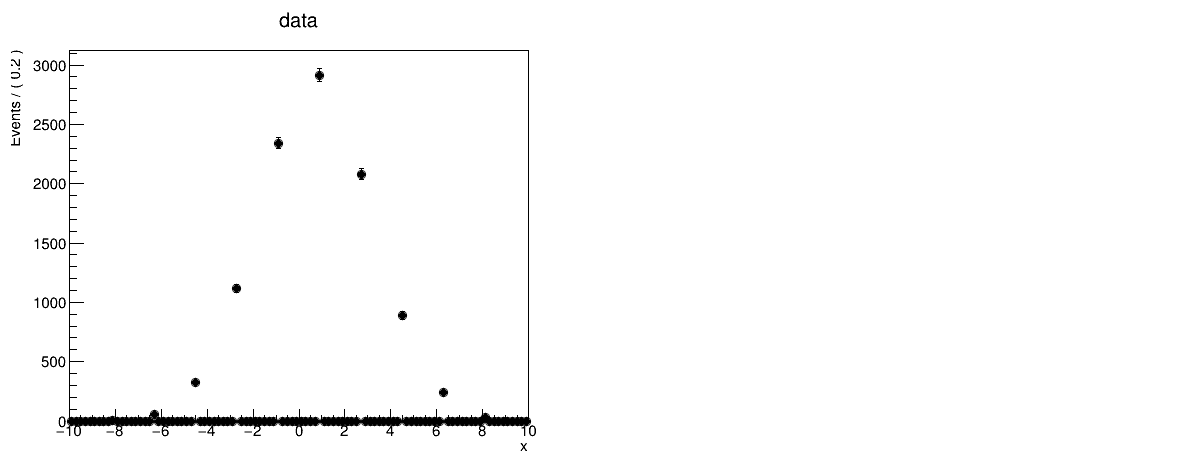

In [22]:
can = ROOT.TCanvas("can","can", 1200, 500)
can.Divide(2,1)

can.cd(1)
xframe = x.frame(ROOT.RooFit.Title("data"))
data_test.plotOn(xframe)
#rbg.plotOn(xframe)
xframe.Draw()
can.Draw()




[#1] INFO:NumericIntegration -- RooRealIntegral::init(rmvn_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: can


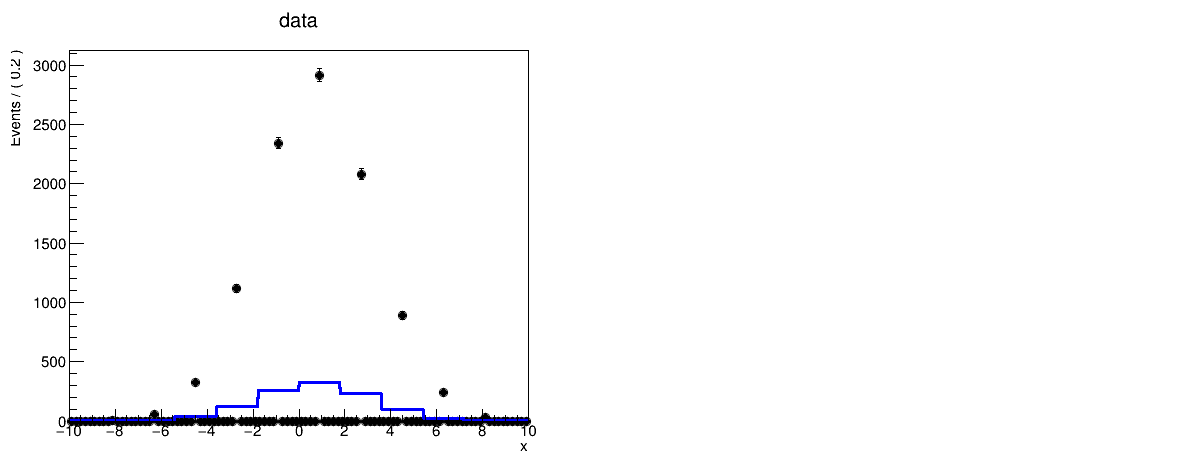

In [23]:
can = ROOT.TCanvas("can","can", 1200, 500)
can.Divide(2,1)

can.cd(1)
xframe = x.frame(ROOT.RooFit.Title("data"))
data_test.plotOn(xframe)
rbg.plotOn(xframe)
xframe.Draw()
can.Draw()